# Figures for "On the Welfare Costs of External Sovereign Borrowing"

In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
from scipy import optimize 


plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['text.latex.preamble'] = [r"""\usepackage[T1]{fontenc}
                                        \usepackage{concrete}"""]

In [2]:
figs = {}
path_to_stelios = ['..', 'Stelios_Working', 'All Model Results']

AG2006_file = os.path.join(*path_to_stelios, 
                    'AG2006', 
                    'Welfare Decomposition', 
                    'transitory06_welfareGainDecomposition.csv')

AG2006_debt_file = os.path.join(*path_to_stelios, "AG2006", 
                    "Paths", "transitory06_apDivYNDPath.csv")

Ar2008_file = os.path.join(*path_to_stelios, 
                    'Ar2008', 'Welfare Decomposition', 
                    'benchmark08_welfareGainDecomposition.csv')

Ar2008_debt_file = os.path.join(*path_to_stelios, "Ar2008", 
                    "Paths", "benchmark08_apDivYNDPath.csv")

CE2012_file = os.path.join(*path_to_stelios, 
                    'CE2012', 'Welfare Decomposition', 
                    'benchmark12_welfareGainDecomposition.csv')

CE2012_debt_file = os.path.join(*path_to_stelios, "CE2012", 
                    "Paths", "benchmark12_apDivYNDPath.csv")

CE2012_indifference_file = os.path.join(*path_to_stelios, 
                    'CE2012', 'Welfare', 
                    'benchmark12_indifferenceResults.csv')

CE2012_lambdaDDecomposition_file = os.path.join(*path_to_stelios, 
                    'LambdaDDecomposition', 'CE2012', 
                    'onePlusLambdaDDecomp.csv')

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 0.8* 6, 0.8*4

title_fs = 14
subtitle_fs = 13
ticks_fs = 12
axis_labels_fs = 12
text_fs = 12

## Theoretical computation

In [4]:
# getting these functions from the mathematica file
def bmax_f(T, bmax, y, sigma, r, rho):
    return (y * (1 - (np.exp(r * T) * (rho + r * (-1 + sigma)))/(rho + 
        r * (-1 + np.exp((
        T * (rho + r * (-1 + sigma)))/sigma) * sigma )))) / r - bmax

def welfare_cost_T(T, y, sigma, r, rho, rhoH):
    return (-y + rhoH ** (1/(1 - sigma)) * (1 - sigma) ** (1/(1 - sigma)) *
            (-((np.exp(-T * rhoH) * ((r - rho) * (-1 + sigma) + 
       np.exp(T * (rhoH + ((r - rho) * (-1 + sigma)) / sigma)) *
                                     rhoH * sigma) * ((
      np.exp(r * T) * y * (rho + r * (-1 + sigma)))/(rho + 
       r * (-1 + np.exp((
           T * (rho + r * (-1 + sigma)))/sigma) *sigma))) ** (
     1 - sigma))/(rhoH * (-1 + sigma) * (-r + rho + (r - rho + rhoH) * sigma)))
            ) **(1/(1 - sigma)))/y

def welfare_cost(bmax, y, sigma, r, rho, rhoH):
    t = find_T(bmax, y, sigma, r, rho)
    return welfare_cost_T(t, y, sigma, r, rho, rhoH)
    
def find_T(bmax, y, sigma, r, rho):
    return optimize.newton(bmax_f, 2, args=(bmax, y, sigma, r, rho))

def lambda_series(bmax, y, sigma, r, rho, rhoH_max=0.4, npoints=20):
    rhoH_list = list(np.linspace(0.001, rhoH_max, npoints)) 
    lambda_theory = [
            welfare_cost(bmax=bmax, y=y, sigma=sigma, r=r, rho=rho, 
                         rhoH=rhoH)
            for rhoH in rhoH_list
        ]
    lambda_theory = np.array(lambda_theory)
    return (rhoH_list, lambda_theory)

## Simple Calculation Plots

### Indifference plot

In [5]:
r = 0.04
y = 1 
bmax = 0.25
sigma = 2
rho_list = np.linspace(r + 0.001, 0.8, 40)
rhoH_indifferent = [
    optimize.newton(lambda rhoH_val: welfare_cost(bmax, y, sigma, r, 
                                                  rho, rhoH_val), rho + 0.1)
    for rho in rho_list
]

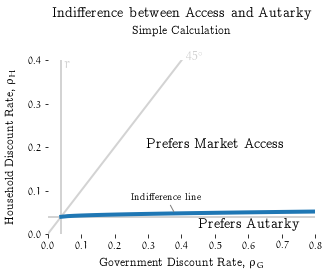

In [6]:

figs["indifference"] = plt.figure()
label_fnsize = 15
ax = plt.subplot(111,)

ax.plot([0, 0.8], [0, 0.8], linewidth=2, color='lightgray')
ax.set_ylim(0, 0.4)
ax.set_xlim(0, 0.8)
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])

ax.axhline(y=r, linewidth=2, color='lightgray')
ax.axvline(x=r,  linewidth=2, color='lightgray')

ax.plot(rho_list, rhoH_indifferent, linewidth=4)

ax.set_ylabel(r'Household Discount Rate, $\rho_H$', 
              fontsize=axis_labels_fs, labelpad=10)
ax.set_xlabel(r'Government Discount Rate, $\rho_G$', 
              fontsize=axis_labels_fs, labelpad=10)

ax.text(0.5, 0.2, r'Prefers Market Access', 
        fontsize=15, horizontalalignment='center')
ax.text(0.6, 0.015, r'Prefers Autarky', fontsize=14, 
        horizontalalignment='center')

ax.text(0.41, 0.4, r'$45^{\circ}$', fontsize=12, color='lightgray')
plt.box(False)

ax.text(r+0.01, 0.38, '$r$', fontsize=14, color='lightgray')

ax.annotate('Indifference line', xy=(0.38, 0.048), 
            xytext=(0.25, 0.08), 
            arrowprops=dict(arrowstyle='-', color='gray'))

ax.text(0.4, 0.5, 'Indifference between Access and Autarky', 
        fontsize=title_fs, horizontalalignment='center');
ax.text(0.4, 0.46, 'Simple Calculation', fontsize=subtitle_fs,
       horizontalalignment='center');

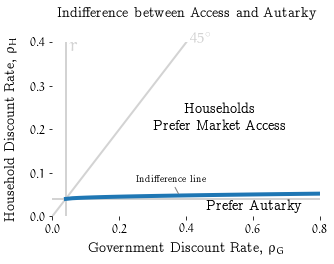

In [7]:
figs["indifference_slides"] = plt.figure()
label_fnsize = 14
ax = plt.subplot(111,)

ax.plot([0, 0.8], [0, 0.8], linewidth=2, color='lightgray')
ax.set_ylim(0, 0.4)
ax.set_xlim(0, 0.8)
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])


ax.tick_params(axis='both', which='major', labelsize=12)
# ax.tick_params(axis='both', which='minor', labelsize=8)

ax.axhline(y=r, linewidth=2, color='lightgray')
ax.axvline(x=r,  linewidth=2, color='lightgray')

ax.plot(rho_list, rhoH_indifferent, linewidth=4)

ax.set_ylabel(r'Household Discount Rate, $\rho_H$', 
              fontsize=axis_labels_fs+2, labelpad=10)
ax.set_xlabel(r'Government Discount Rate, $\rho_G$', 
              fontsize=axis_labels_fs+2, labelpad=10)

ax.text(0.5, 0.24, r'Households', 
        fontsize=15, horizontalalignment='center')
ax.text(0.5, 0.2, r'Prefer Market Access', 
        fontsize=15, horizontalalignment='center')
ax.text(0.6, 0.015, r'Prefer Autarky', fontsize=14, 
        horizontalalignment='center')

ax.text(0.41, 0.4, u'$45^{\circ}$', fontsize=15, color='lightgray')
plt.box(False)

ax.text(r+0.01, 0.38, '$r$', fontsize=20, color='lightgray')

ax.annotate('Indifference line', xy=(0.38, 0.048), 
            xytext=(0.25, 0.08), 
            arrowprops=dict(arrowstyle='-', color='gray'))

ax.text(0.4, 0.46, 'Indifference between Access and Autarky', 
        fontsize=15, horizontalalignment='center');
# ax.text(0.4, 0.46, 'Simple Calculation', fontsize=subtitle_fs,
#        horizontalalignment='center');

### Welfare Gains Plot

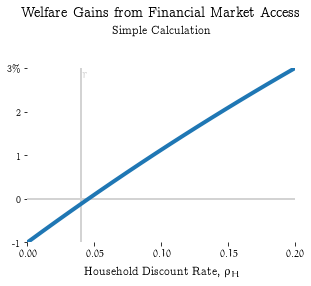

In [8]:
r = 0.04
y = 1 
bmax = 0.25
sigma = 2
rho = 0.2

lambda_theory = lambda_series(bmax, y, sigma, r, rho, 
                              rhoH_max=0.2, npoints=20)

figs['welfare_theory'] = plt.figure()
ax = plt.subplot(111)
# ax.set_ylabel(r'Percentage Points of Consumption', fontsize=14)
ax.set_xlabel(r'Household Discount Rate, $\rho_H$', fontsize=axis_labels_fs, 
              labelpad=10)
ax.set_xticks([0.0, 0.05, 0.1, 0.15, 0.20])

ax.set_yticks([-1, 0, 1, 2, 3])
labs = ['-1', ' 0', ' 1', ' 2', r' 3$\%$ ']
ax.set_yticklabels(labels=
                  [lab + ('   ' if i < len(labs) -1 else '') 
                       for i, lab in enumerate(labs)
                  ])


ax.set_ylim(-1, 3)
ax.set_xlim(0, 0.2)
ax.axhline(y=0, color='lightgray', linewidth=2)
ax.axvline(x=r, color='lightgray', linewidth=2)

ax.plot(lambda_theory[0], 100 * lambda_theory[1], linewidth=4)
plt.box(False)
ax.text(r+0.001, 2.8, '$r$', fontsize=text_fs, color='lightgray')

ax.text(0.1, 4.2, 'Welfare Gains from Financial Market Access', 
             fontsize=title_fs, horizontalalignment='center');
ax.text(0.1, 3.8, 'Simple Calculation', 
             fontsize=subtitle_fs, horizontalalignment='center');

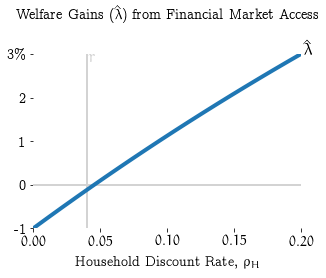

In [9]:
r = 0.04
y = 1 
bmax = 0.25
sigma = 2
rho = 0.2

lambda_theory = lambda_series(bmax, y, sigma, r, rho, 
                              rhoH_max=0.2, npoints=20)

figs['welfare_theory_slides'] = plt.figure()
ax = plt.subplot(111)
# ax.set_ylabel(r'Percentage Points of Consumption', fontsize=14)
ax.set_xlabel(r'Household Discount Rate, $\rho_H$', fontsize=axis_labels_fs+2, 
              labelpad=10)
ax.set_xticks([0.0, 0.05, 0.1, 0.15, 0.20])

ax.tick_params(axis='both', which='major', labelsize=14)

ax.set_yticks([-1, 0, 1, 2, 3])
labs = ['-1', ' 0', ' 1', ' 2', ' 3$\%$ ']
ax.set_yticklabels(labels=
                  [lab + ('   ' if i < len(labs) -1 else '') 
                       for i, lab in enumerate(labs)
                  ])


ax.text(0.201, 3, "$\hat\lambda$", fontsize=16)

ax.set_ylim(-1, 3)
ax.set_xlim(0, 0.2)
ax.axhline(y=0, color='lightgray', linewidth=2)
ax.axvline(x=r, color='lightgray', linewidth=2)

ax.plot(lambda_theory[0], 100 * lambda_theory[1], linewidth=4)
plt.box(False)
ax.text(r+0.001, 2.8, '$r$', fontsize=text_fs+5, color='lightgray')

ax.text(0.1, 3.8, 'Welfare Gains ($\hat\lambda$) from Financial Market Access', 
             fontsize=title_fs, horizontalalignment='center');

## Aguiar Gopinath 2006

In [10]:
decomposition_AG2006 = pd.read_csv(AG2006_file, header=None, 
                                   names=['beta', '1+lambda', 
                                          '1+lambdaD', '1+lambdaV',
                                          '1+lambdaT', '1+lambdaR'])

decomposition_AG2006['rho'] = -np.log(decomposition_AG2006['beta'] ** 4)
decomposition_AG2006 = decomposition_AG2006.set_index('rho')


rAG06 = 4 * np.log(1 + 0.01)
rhoAG06 = - 4 * np.log(0.8)

In [11]:
# computing bmax

# reading the debt series from file
bmaxAG06temp = - pd.read_csv(AG2006_debt_file, header=None, names=['debt'])
# selecting last value as steady state value
bmaxAG06 = bmaxAG06temp['debt'].iloc[[-1]].values[0] / 4

print(bmaxAG06)
# correcting it to remove the coupon -- see paper 

0.06021919760562323


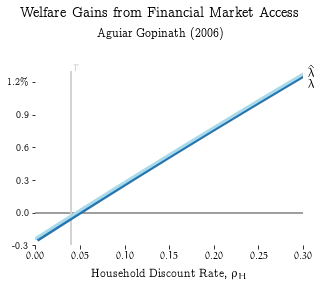

In [12]:
figs['AG06'] = plt.figure()

ax = plt.subplot(111)
ax.axhline(y=0, color='gray')
ax.axvline(x=rAG06, color='lightgray', linewidth=2)
ax.axvline(x=rhoAG06, color='lightgray',linewidth=2)

(100 * (decomposition_AG2006['1+lambda'] - 1)).plot(linewidth=4)


ax.set_xlabel(r'Household Discount Rate, $\rho_H$', 
              fontsize=axis_labels_fs, labelpad=10)
# ax.set_ylabel(r'Percentage Points of Consumption', fontsize=14)


plt.box(False)


lambda_series_AG = lambda_series(bmax=bmaxAG06, y=1, 
                                 sigma=2, r=rAG06, rho=rhoAG06)
ax.plot(lambda_series_AG[0], 100 * lambda_series_AG[1], 
        linewidth=3, color='lightblue')


ax.set_yticks([-0.3, 0, 0.3, 0.6, 0.9, 1.2 ])
labs = ['-0.3', ' 0.0', ' 0.3', ' 0.6', ' 0.9', ' 1.2$\%$']
ax.set_yticklabels(labels=
                  [lab + ('   ' if i < len(labs) -1 else '') 
                       for i, lab in enumerate(labs)
                  ])

ax.set_xlim(0.0, 0.3)
ax.set_ylim(-30/100, 130/100)


ax.text(rAG06+0.002, 130/100, r'$r$', fontsize=14, color='lightgray')
# ax.text(rhoAG06+0.002, 40/100, r'$\rho_G$', fontsize=14)

ax.text(0.305, 115/100, r'$\lambda$', fontsize=text_fs)
ax.text(0.305, 125/100, r'$\hat\lambda$', fontsize=text_fs)

ax.text(0.14, 180/100, 'Welfare Gains from Financial Market Access', 
             fontsize=title_fs, horizontalalignment='center');
ax.text(0.14, 162/100, 'Aguiar Gopinath (2006)', 
        fontsize=subtitle_fs, horizontalalignment='center');

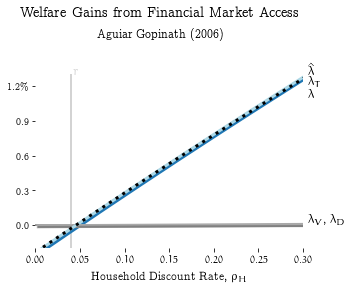

In [13]:
figs['AG06_decomposition'] = plt.figure()

label_fnsize = 15
ax = plt.subplot(111)
ax.axhline(y=0, color='gray')
ax.axvline(x=rAG06, color='lightgray', linewidth=2)
ax.axvline(x=rhoAG06, color='lightgray', linewidth=2)

(100 * (decomposition_AG2006['1+lambda'] - 1)).plot(linewidth=4)

(100 * (decomposition_AG2006['1+lambdaV'] - 1)).plot(color='darkgray', linewidth=4)
(100 * (decomposition_AG2006['1+lambdaD'] - 1)).plot(color='gray', linewidth=2)
#(100 * (decomposition_AG2006['1+lambdaR'] - 1)).plot(linewidth=2)

# ax.set_ylabel(r'Percentage Points of Consumption', fontsize=14)


plt.box(False)


lambda_series_AG = lambda_series(bmax=bmaxAG06, y=1, 
                                 sigma=2, r=rAG06, rho=rhoAG06)
ax.plot(lambda_series_AG[0], 100 * lambda_series_AG[1], 
        linewidth=3, color='lightblue')

(100 * (decomposition_AG2006['1+lambdaT'] - 1)).plot(linewidth=3, 
                                                     linestyle=':',
                                                    color='k')


ax.set_yticks([-0.3, 0, 0.3, 0.6, 0.9, 1.2 ])
labs = ['-0.3', ' 0.0', ' 0.3', ' 0.6', ' 0.9', ' 1.2$\%$']
ax.set_yticklabels(labels=
                  [lab + ('   ' if i < len(labs) -1 else '') 
                       for i, lab in enumerate(labs)
                  ])

ax.set_xlim(0.0, 0.3)
ax.set_ylim(-20/100, 130/100)


ax.text(rAG06+0.002, 130/100, r'$r$', fontsize=text_fs, color='lightgray')
# ax.text(rhoAG06+0.002, 40/100, r'$\rho_G$', fontsize=14)

ax.text(0.305, 110/100, r'$\lambda$', fontsize=text_fs)
ax.text(0.305, 130/100, r'$\hat\lambda$', fontsize=text_fs)
ax.text(0.305, 120/100, r'$\lambda_T$', fontsize=text_fs)
ax.text(0.305, 0/100, r'$\lambda_V$, $\lambda_D$', fontsize=text_fs)


ax.text(0.14, 180/100, 'Welfare Gains from Financial Market Access', 
             fontsize=title_fs, horizontalalignment='center')
ax.text(0.14, 162/100, 'Aguiar Gopinath (2006)', 
        fontsize=subtitle_fs, horizontalalignment='center')

ax.set_xlabel(r'Household Discount Rate, $\rho_H$', 
              fontsize=axis_labels_fs, labelpad=10);


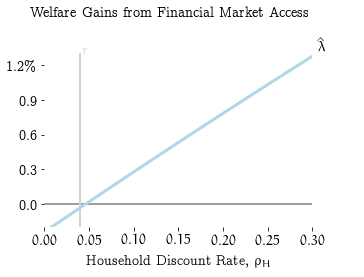

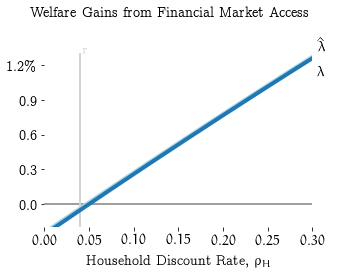

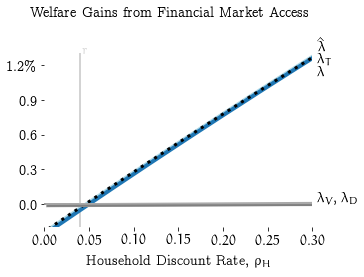

In [14]:
for i in range(3):
    figs['AG06_decomposition_slides' +"_" + str(i)] = plt.figure()

    label_fnsize = 15
    ax = plt.subplot(111)
    ax.axhline(y=0, color='gray')
    ax.axvline(x=rAG06, color='lightgray', linewidth=2)
    ax.axvline(x=rhoAG06, color='lightgray', linewidth=2)


    # ax.set_ylabel(r'Percentage Points of Consumption', fontsize=14)


    plt.box(False)
    
#    plt.tight_layout()

    
    ax.text(0.305, 0/100, r'$\lambda_V$, $\lambda_D$', fontsize=text_fs+2, color="white")
    ax.text(0.305, 132/100, r'$\hat\lambda$', fontsize=text_fs+2, color="white")
    ax.text(0.305, 120/100, r'$\lambda_T$', fontsize=text_fs+2, color="white")
    ax.text(0.305, 110/100, r'$\lambda$', fontsize=text_fs+2, color="white")
    ax.text(0.305, 0/100, r'$\lambda_V$, $\lambda_D$', fontsize=text_fs+2, color="white")

    
    lambda_series_AG = lambda_series(bmax=bmaxAG06, y=1, 
                                     sigma=2, r=rAG06, rho=rhoAG06)
    
    if i >= 0:
        ax.plot(lambda_series_AG[0], 100 * lambda_series_AG[1], 
                linewidth=3, color='lightblue')
        ax.text(0.305, 132/100, r'$\hat\lambda$', fontsize=text_fs+2)

    if i >= 1:
        (100 * (decomposition_AG2006['1+lambda'] - 1)).plot(linewidth=4)
        ax.text(0.305, 110/100, r'$\lambda$', fontsize=text_fs+2)

    
    if i >= 2:
        (100 * (decomposition_AG2006['1+lambdaT'] - 1)).plot(linewidth=3, 
                                                         linestyle=':',
                                                        color='k')
        ax.text(0.305, 120/100, r'$\lambda_T$', fontsize=text_fs+2)

        (100 * (decomposition_AG2006['1+lambdaV'] - 1)).plot(color='darkgray', linewidth=4)
        (100 * (decomposition_AG2006['1+lambdaD'] - 1)).plot(color='gray', linewidth=2)
        ax.text(0.305, 0/100, r'$\lambda_V$, $\lambda_D$', fontsize=text_fs+2)

    
    ax.tick_params(axis='both', which='major', labelsize=14)

    ax.set_yticks([-0.3, 0, 0.3, 0.6, 0.9, 1.2 ])
    labs = ['-0.3', ' 0.0', ' 0.3', ' 0.6', ' 0.9', ' 1.2$\%$']
    ax.set_yticklabels(labels=
                      [lab + ('   ' if i < len(labs) -1 else '') 
                           for i, lab in enumerate(labs)
                      ])

    ax.set_xlim(0.0, 0.3)
    ax.set_ylim(-20/100, 130/100)


    ax.text(rAG06+0.002, 130/100, r'$r$', fontsize=text_fs, color='lightgray')
    # ax.text(rhoAG06+0.002, 40/100, r'$\rho_G$', fontsize=14)



    ax.text(0.14, 162/100, 'Welfare Gains from Financial Market Access', 
                 fontsize=title_fs+1, horizontalalignment='center')
    # ax.text(0.14, 162/100, 'Aguiar Gopinath (2008)', 
    #         fontsize=subtitle_fs, horizontalalignment='center')

    ax.set_xlabel(r'Household Discount Rate, $\rho_H$', 
                  fontsize=axis_labels_fs+2, labelpad=10);


## Arellano 2008

In [15]:
decomposition_Ar2008 = pd.read_csv(Ar2008_file, header=None, 
                                   names=['beta', '1+lambda', 
                                          '1+lambdaD', '1+lambdaV',
                                          '1+lambdaT', '1+lambdaR'])

decomposition_Ar2008['rho'] = -np.log(decomposition_Ar2008['beta'] ** 4)
decomposition_Ar2008 = decomposition_Ar2008.set_index('rho')

rAr08 = 4 * np.log(1 + 0.017)
rhoAr08 = - 4 * np.log(0.95282)

In [16]:
# computing bmax

# reading the debt series from file
bmaxAr08temp = - pd.read_csv(Ar2008_debt_file, header=None, names=['debt'])
# selecting last value as steady state value
bmaxAr08 = bmaxAr08temp['debt'].iloc[[-1]].values[0] / 4

print(bmaxAr08)
# correcting it to remove the coupon -- see paper 

0.010997427849886334


In [17]:
decomposition_Ar2008[decomposition_Ar2008['1+lambda']  - 1 <= 0].head()

,beta,1+lambda,1+lambdaD,1+lambdaV,1+lambdaT,1+lambdaR
rho,,,,,,
0.130093,0.9680,0.999992,0.999882,0.999529,1.000581,NaN
0.128027,0.9685,0.999975,0.999881,0.999531,1.000562,NaN
0.125963,0.9690,0.999958,0.999881,0.999534,1.000543,NaN
0.123899,0.9695,0.999941,0.999881,0.999536,1.000525,NaN
0.121837,0.9700,0.999924,0.999880,0.999538,1.000506,NaN


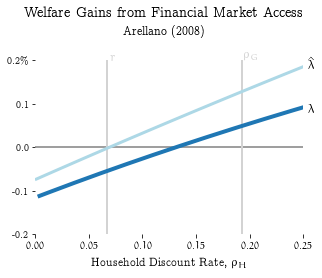

In [18]:
figs['Ar08'] = plt.figure()

ax = plt.subplot(111)
ax.axhline(y=0, color='gray')
ax.axvline(x=rAr08, color='lightgray', linewidth=2)
ax.axvline(x=rhoAr08, color='lightgray', linewidth=2)

(100 * (decomposition_Ar2008['1+lambda'] - 1)).plot(linewidth=4)


ax.set_xlabel(r'Household Discount Rate, $\rho_H$', 
              fontsize=axis_labels_fs, labelpad=10)
# ax.set_ylabel(r'Percentage Points of Consumption', fontsize=14)

ax.set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
labs = ['-0.2', '-0.1', ' 0.0', ' 0.1', ' 0.2$\%$']
ax.set_yticklabels(labels=
                  [lab + ('   ' if i < len(labs) -1 else '') 
                       for i, lab in enumerate(labs)
                  ])

ax.set_xlim(0.0, 0.25)
ax.set_ylim(-20/100, 20/100)

plt.box(False)


lambda_series_Ar = lambda_series(bmax=bmaxAr08, y=1, 
                                 sigma=2, r=rAr08, rho=rhoAr08)
ax.plot(lambda_series_Ar[0], 100 * lambda_series_Ar[1], 
        linewidth=3, color='lightblue')


ax.text(rAr08+0.002, 20/100, r'$r$', fontsize=text_fs, color='lightgray')
ax.text(rhoAr08+0.002, 20/100, r'$\rho_G$', fontsize=text_fs, color='lightgray')

ax.text(0.255, 18/100, r'$\hat \lambda$', fontsize=text_fs)
ax.text(0.255, 8/100, r'$\lambda$', fontsize=text_fs)

ax.text(0.12, 30/100, 'Welfare Gains from Financial Market Access', 
             fontsize=title_fs, horizontalalignment='center');
ax.text(0.12, 26/100, 'Arellano (2008)', 
        fontsize=subtitle_fs, horizontalalignment='center');

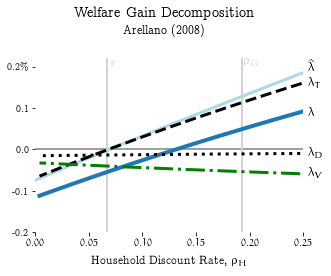

In [19]:

figs['Ar08_decomposition'] = plt.figure()
label_fnsize = 15
ax = plt.subplot(111)
ax.axhline(y=0, color='gray')
ax.axvline(x=rAr08, color='lightgray', linewidth=2)
ax.axvline(x=rhoAr08, color='lightgray', linewidth=2)

lambda_series_Ar = lambda_series(bmax=bmaxAr08, y=1, 
                                 sigma=2, r=rAr08, rho=rhoAr08)
ax.plot(lambda_series_Ar[0], 100 * lambda_series_Ar[1], 
        linewidth=3, color='lightblue')
ax.text(0.255, 19/100, r'$\hat\lambda$', fontsize=text_fs)

(100 * (decomposition_Ar2008['1+lambda'] - 1)).plot(linewidth=4)
ax.text(0.255, 8.2/100, r'$\lambda$', fontsize=text_fs)


(100 * (decomposition_Ar2008['1+lambdaT'] - 1)).plot(style='--', 
                                                     linewidth=3, 
                                                     color='k')
ax.text(0.255, 15/100, r'$\lambda_T$', fontsize=text_fs)


(100 * (decomposition_Ar2008['1+lambdaV'] - 1)).plot(style='-.', 
                                                     linewidth=3, 
                                                     color='green')
ax.text(0.255, -7/100, r'$\lambda_V$', fontsize=text_fs)


(100 * (decomposition_Ar2008['1+lambdaD'] - 1)).plot(style=':', 
                                                     linewidth=3, 
                                                     color='k')
ax.text(0.255, -2/100, r'$\lambda_D$', fontsize=text_fs)


ax.set_xlabel(r'Household Discount Rate, $\rho_H$', 
              fontsize=axis_labels_fs, labelpad=10)
# ax.set_ylabel(r'Percentage Points of Consumption', fontsize=14)




plt.box(False)


ax.text(rAr08 + 0.002, 20/100, r'$r$', fontsize=text_fs, color='lightgray')
ax.text(rhoAr08 + 0.002, 20/100, r'$\rho_G$', fontsize=text_fs, color='lightgray')

ax.set_yticks([-2/10, -1/10, 0, 1/10, 2/10])
labs = ['-0.2', '-0.1', ' 0.0', ' 0.1', ' 0.2$\%$']
ax.set_yticklabels(labels=
                  [lab + ('   ' if i < len(labs) -1 else '') 
                       for i, lab in enumerate(labs)
                  ])
ax.set_ylim(-20/100, 22/100)
ax.set_xlim(0, 0.25)

ax.text(0.12, 32/100, 'Welfare Gain Decomposition', 
             fontsize=title_fs, horizontalalignment='center');
ax.text(0.12, 28/100, 'Arellano (2008)', 
        fontsize=subtitle_fs, horizontalalignment='center');

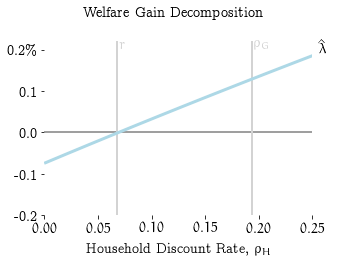

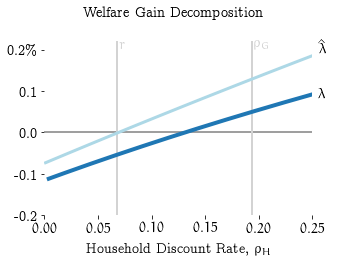

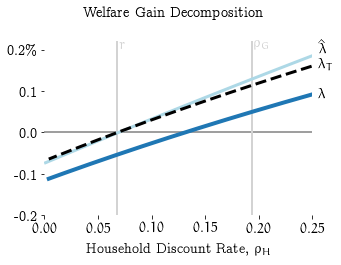

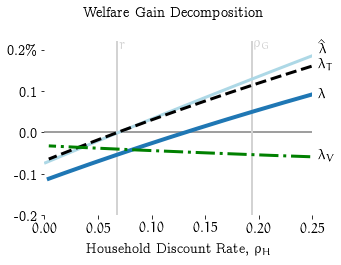

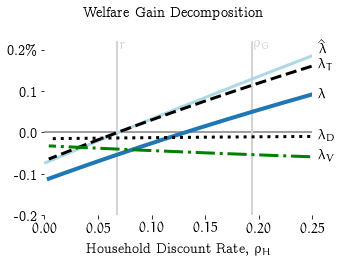

In [20]:
for i in range(5):
    figs['Ar08_decomposition_slides' + "_" + str(i)] = plt.figure()
    label_fnsize = 15
    ax = plt.subplot(111)
    ax.axhline(y=0, color='gray')
    ax.axvline(x=rAr08, color='lightgray', linewidth=2)
    ax.axvline(x=rhoAr08, color='lightgray', linewidth=2)


    ax.text(0.255, 19/100, r'$\hat\lambda$', fontsize=text_fs+2, color="white")
    ax.text(0.255, 8.2/100, r'$\lambda$', fontsize=text_fs+2, color="white")
    ax.text(0.255, 15/100, r'$\lambda_T$', fontsize=text_fs+2, color="white")
    ax.text(0.255, -7/100, r'$\lambda_V$', fontsize=text_fs+2, color="white")
    ax.text(0.255, -2/100, r'$\lambda_D$', fontsize=text_fs+2, color="white")

        
    if i >=0:
        lambda_series_Ar = lambda_series(bmax=bmaxAr08, y=1, 
                                         sigma=2, r=rAr08, rho=rhoAr08)
        ax.plot(lambda_series_Ar[0], 100 * lambda_series_Ar[1], 
                linewidth=3, color='lightblue')
        ax.text(0.255, 19/100, r'$\hat\lambda$', fontsize=text_fs+2)

    if i>=1:
        (100 * (decomposition_Ar2008['1+lambda'] - 1)).plot(linewidth=4)
        ax.text(0.255, 8.2/100, r'$\lambda$', fontsize=text_fs+2)


    if i>=2:
        (100 * (decomposition_Ar2008['1+lambdaT'] - 1)).plot(style='--', 
                                                             linewidth=3, 
                                                             color='k')
        ax.text(0.255, 15/100, r'$\lambda_T$', fontsize=text_fs+2)


    if i>=3:
        (100 * (decomposition_Ar2008['1+lambdaV'] - 1)).plot(style='-.', 
                                                             linewidth=3, 
                                                             color='green')
        ax.text(0.255, -7/100, r'$\lambda_V$', fontsize=text_fs+2)


    if i>=4:
        (100 * (decomposition_Ar2008['1+lambdaD'] - 1)).plot(style=':', 
                                                             linewidth=3, 
                                                             color='k')
        ax.text(0.255, -2/100, r'$\lambda_D$', fontsize=text_fs+2)


    ax.tick_params(axis='both', which='major', labelsize=14)

    ax.set_xlabel(r'Household Discount Rate, $\rho_H$', 
                  fontsize=axis_labels_fs+2, labelpad=10)
    # ax.set_ylabel(r'Percentage Points of Consumption', fontsize=14)


    plt.box(False)

    ax.text(rAr08 + 0.002, 20/100, r'$r$', fontsize=text_fs+2, color='lightgray')
    ax.text(rhoAr08 + 0.002, 20/100, r'$\rho_G$', fontsize=text_fs+2, color='lightgray')

    ax.set_yticks([-2/10, -1/10, 0, 1/10, 2/10])
    labs = ['-0.2', '-0.1', ' 0.0', ' 0.1', ' 0.2$\%$']
    ax.set_yticklabels(labels=
                      [lab + ('   ' if i < len(labs) -1 else '') 
                           for i, lab in enumerate(labs)
                      ])
    ax.set_ylim(-20/100, 22/100)
    ax.set_xlim(0, 0.25)

    ax.text(0.12, 28/100, 'Welfare Gain Decomposition', 
                 fontsize=title_fs, horizontalalignment='center');
    # ax.text(0.12, 28/100, 'Arellano (2008)', 
    #         fontsize=subtitle_fs, horizontalalignment='center');

## CE2012

In [21]:
decomposition_CE2012 = pd.read_csv(CE2012_file, header=None, 
                                   names=['beta', '1+lambda', 
                                          '1+lambdaD', '1+lambdaV',
                                          '1+lambdaT', '1+lambdaR'])

decomposition_CE2012['rho'] = -np.log(decomposition_CE2012['beta'] ** 4)
decomposition_CE2012 = decomposition_CE2012.set_index('rho')

rCE12 = 4 * np.log(1.01)
rhoCE12 = - 4 * np.log(0.9540232420)

In [22]:
# computing bmax

# reading the debt series from file
bmaxCE12temp = - pd.read_csv(CE2012_debt_file, header=None, names=['debt'])
# selecting last value as steady state value
bmaxCE12temp = bmaxCE12temp['debt'].iloc[[-1]].values[0]

# correcting it to remove the coupon -- see paper 
z = 4 * 0.03
lam = 4 * 0.05
bmaxCE12 = (lam + (1-lam) * z)/(rCE12 + lam) * bmaxCE12temp / 4
print(bmaxCE12)

0.22107767779532644


In [23]:
decomposition_CE2012[decomposition_CE2012['1+lambda']  - 1 <= 0].head()

,beta,1+lambda,1+lambdaD,1+lambdaV,1+lambdaT,1+lambdaR
rho,,,,,,
0.101271,0.9750,0.999860,0.993470,0.999424,1.007012,NaN
0.099220,0.9755,0.999525,0.993380,0.999428,1.006762,NaN
0.097171,0.9760,0.999190,0.993288,0.999432,1.006513,NaN
0.095122,0.9765,0.998853,0.993195,0.999436,1.006264,NaN
0.093075,0.9770,0.998514,0.993101,0.999440,1.006014,NaN


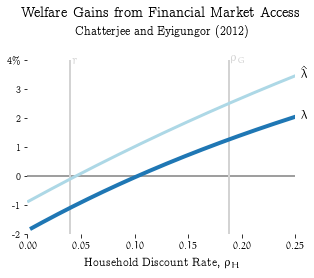

In [24]:
figs['CE12'] = plt.figure()

ax = plt.subplot(111)
ax.axhline(y=0, color='gray')
ax.axvline(x=rCE12, color='lightgray', linewidth=2)
ax.axvline(x=rhoCE12, color='lightgray', linewidth=2)

(100 * (decomposition_CE2012['1+lambda'] - 1)).plot(linewidth=4)

ax.set_xlim(0.0, 0.25)
ax.set_ylim(-2, 4)

ax.set_xlabel(r'Household Discount Rate, $\rho_H$', 
              fontsize=axis_labels_fs, labelpad=10)
# ax.set_ylabel(r'Percentage Points of Consumption', fontsize=14)

# ax.text(0.35, -.7, r'$\lambda_D$', fontsize=label_fnsize)
# ax.text(0.35, 3.65, r'$\lambda_T$', fontsize=label_fnsize)

ax.set_yticks([-2, -1, 0, 1, 2, 3, 4])
labs = ['-2', '-1', ' 0', ' 1', ' 2', ' 3', ' 4$\%$']
ax.set_yticklabels(labels=
                  [lab + ('   ' if i < len(labs) -1 else '') 
                       for i, lab in enumerate(labs)
                  ])

plt.box(False)


lambda_series_CE = lambda_series(bmax=bmaxCE12, y=1, 
                                 sigma=2, r=rCE12, rho=rhoCE12)
ax.plot(lambda_series_CE[0], 100 * lambda_series_CE[1], 
        linewidth=3, color='lightblue')

ax.text(rCE12+0.002, 3.9, r'$r$', fontsize=text_fs, color='lightgray')
ax.text(rhoCE12+0.002, 3.9, r'$\rho_G$', fontsize=text_fs, color='lightgray')

ax.text(0.255, 2, r'$\lambda$', fontsize=text_fs)
ax.text(0.255, 3.4, r'$\hat\lambda$', fontsize=text_fs)

ax.text(0.125, 5.5, 'Welfare Gains from Financial Market Access', 
             fontsize=title_fs, horizontalalignment='center');
ax.text(0.125, 4.9, 'Chatterjee and Eyigungor (2012)', 
        fontsize=subtitle_fs, horizontalalignment='center');

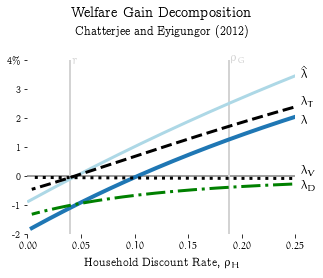

In [25]:
figs['CE12_decomposition'] = plt.figure()

ax = plt.subplot(111)
ax.axhline(y=0, color='gray')
ax.axvline(x=rCE12, color='lightgray', linewidth=2)
ax.axvline(x=rhoCE12, color='lightgray', linewidth=2)

ax.set_ylim(-2, 4)


ax.set_yticks([-2, -1, 0, 1, 2, 3, 4])
labs = ['-2', '-1', ' 0', ' 1', ' 2', ' 3', ' 4$\%$']
ax.set_yticklabels(labels=
                  [lab + ('   ' if i < len(labs) -1 else '') 
                       for i, lab in enumerate(labs)
                  ])

lambda_series_CE = lambda_series(bmax=bmaxCE12, y=1, 
                                 sigma=2, r=rCE12, rho=rhoCE12)
ax.plot(lambda_series_CE[0], 100 * lambda_series_CE[1], 
        linewidth=3, color='lightblue')
ax.text(0.255, 3.4, r'$\hat\lambda$', fontsize=text_fs)


(100 * (decomposition_CE2012['1+lambda'] - 1)).plot(linewidth=4)
ax.text(0.255, 1.8, r'$\lambda$', fontsize=text_fs)


(100 * (decomposition_CE2012['1+lambdaT'] - 1)).plot(style='--', 
                                                     linewidth=3, 
                                                     color='k')
ax.text(0.255, 2.4, r'$\lambda_T$', fontsize=text_fs)

(100 * (decomposition_CE2012['1+lambdaD'] - 1)).plot(style='-.', 
                                                     linewidth=3, 
                                                     color='green')
ax.text(0.255, -0.5, r'$\lambda_D$', fontsize=text_fs)

(100 * (decomposition_CE2012['1+lambdaV'] - 1)).plot(linewidth=3, 
                                                     style=':', 
                                                     color='k')
ax.text(0.255, -0, r'$\lambda_V$', fontsize=text_fs)


ax.set_xlabel(r'Household Discount Rate, $\rho_H$', 
              fontsize=axis_labels_fs, labelpad=10)
# ax.set_ylabel(r'Percentage Points of Consumption', fontsize=14)


plt.box(False)


ax.text(rCE12+0.002, 3.9, r'$r$', fontsize=text_fs, color='lightgray')
ax.text(rhoCE12+0.002, 3.9, r'$\rho_G$', fontsize=text_fs, color='lightgray')



ax.text(0.125, 5.5, 'Welfare Gain Decomposition', 
             fontsize=title_fs, horizontalalignment='center')
ax.text(0.125, 4.9, 'Chatterjee and Eyigungor (2012)', 
        fontsize=subtitle_fs, horizontalalignment='center')

ax.set_xlim(0.0, 0.25);


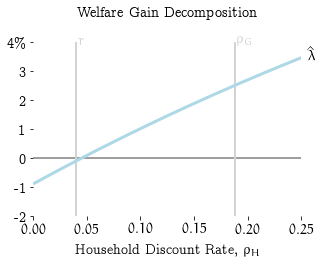

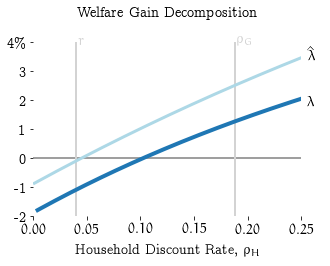

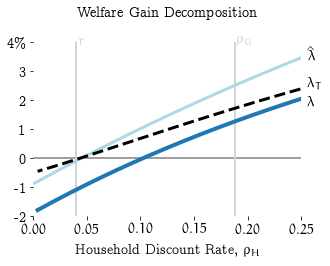

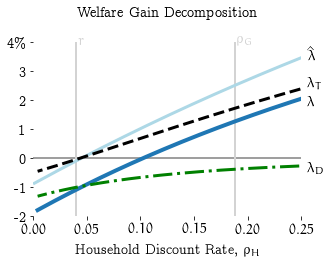

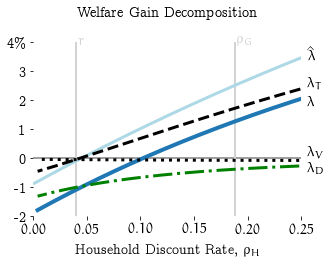

In [26]:
for i in range(5):
    figs['CE12_decomposition_slides' + "_" + str(i)] = plt.figure()

    ax = plt.subplot(111)
    ax.axhline(y=0, color='gray')
    ax.axvline(x=rCE12, color='lightgray', linewidth=2)
    ax.axvline(x=rhoCE12, color='lightgray', linewidth=2)

    ax.set_ylim(-2, 4)


    ax.set_yticks([-2, -1, 0, 1, 2, 3, 4])
    labs = ['-2', '-1', ' 0', ' 1', ' 2', ' 3', ' 4$\%$']
    ax.set_yticklabels(labels=
                      [lab + ('   ' if i < len(labs) -1 else '') 
                           for i, lab in enumerate(labs)
                      ])

    ax.text(0.255, 3.4, r'$\hat\lambda$', fontsize=text_fs+2, color="white")
    ax.text(0.255, 1.8, r'$\lambda$', fontsize=text_fs+2, color="white")
    ax.text(0.255, 2.4, r'$\lambda_T$', fontsize=text_fs+2, color="white")
    ax.text(0.255, -0.5, r'$\lambda_D$', fontsize=text_fs+2, color="white")
    ax.text(0.255, -0, r'$\lambda_V$', fontsize=text_fs+2, color="white")
        
    if i>=0:
        lambda_series_CE = lambda_series(bmax=bmaxCE12, y=1, 
                                         sigma=2, r=rCE12, rho=rhoCE12)
        ax.plot(lambda_series_CE[0], 100 * lambda_series_CE[1], 
                linewidth=3, color='lightblue')
        ax.text(0.255, 3.4, r'$\hat\lambda$', fontsize=text_fs+2)


    if i>=1:
        (100 * (decomposition_CE2012['1+lambda'] - 1)).plot(linewidth=4)
        ax.text(0.255, 1.8, r'$\lambda$', fontsize=text_fs+2)


    if i>=2:
        (100 * (decomposition_CE2012['1+lambdaT'] - 1)).plot(style='--', 
                                                             linewidth=3, 
                                                             color='k')
        ax.text(0.255, 2.4, r'$\lambda_T$', fontsize=text_fs+2)


    if i>=3:
        (100 * (decomposition_CE2012['1+lambdaD'] - 1)).plot(style='-.', 
                                                             linewidth=3, 
                                                             color='green')
        ax.text(0.255, -0.5, r'$\lambda_D$', fontsize=text_fs+2)
    

    if i>=4:
        (100 * (decomposition_CE2012['1+lambdaV'] - 1)).plot(linewidth=3, 
                                                             style=':', 
                                                             color='k')
        ax.text(0.255, -0, r'$\lambda_V$', fontsize=text_fs+2)


    ax.tick_params(axis='both', which='major', labelsize=14)

    ax.set_xlabel(r'Household Discount Rate, $\rho_H$', 
                  fontsize=axis_labels_fs+2, labelpad=10)
    # ax.set_ylabel(r'Percentage Points of Consumption', fontsize=14)


    plt.box(False)



    ax.text(rCE12+0.002, 3.9, r'$r$', fontsize=text_fs+2, color='lightgray')
    ax.text(rhoCE12+0.002, 3.9, r'$\rho_G$', fontsize=text_fs+2, color='lightgray')


    ax.text(0.125, 4.9, 'Welfare Gain Decomposition', 
                 fontsize=title_fs, horizontalalignment='center')
    # ax.text(0.125, 4.9, 'Chatterjee and Eyigungor (2012)', 
    #         fontsize=subtitle_fs, horizontalalignment='center')

    ax.set_xlim(0.0, 0.25);


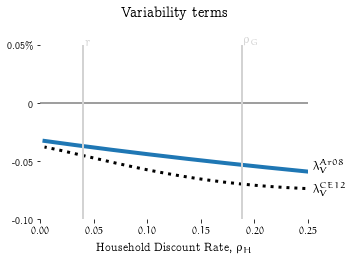

In [27]:
figs['CE12_vs_Are2008'] = plt.figure()
label_fnsize = 15
ax = plt.subplot(111)
ax.axhline(y=0, color='gray')

(100 * (decomposition_Ar2008['1+lambdaV'] - 1)).plot(linewidth=4)
(100 * (decomposition_CE2012['1+lambdaV'] - 1)).plot(linewidth=3, 
                                                     style=':', 
                                                     color='k')

ax.axvline(x=rCE12, color='lightgray', linewidth=2)
ax.axvline(x=rhoCE12, color='lightgray', linewidth=2)


ax.set_xlim(0.0, 0.25)

ax.set_xlabel(r'Household Discount Rate, $\rho_H$', 
              fontsize=axis_labels_fs, labelpad=10)

ax.set_yticks([-0.10, -0.05, 0, 0.05])
labs = ['-0.10', '-0.05', ' 0   ', ' 0.05$\%$']
ax.set_yticklabels(labels=
                  [lab + ('   ' if i < len(labs) -1 else '') 
                       for i, lab in enumerate(labs)
                  ])

plt.box(False)


ax.text(rCE12+0.002, 0.05, r'$r$', fontsize=text_fs, color='lightgray')
ax.text(rhoCE12+0.002, 0.05, r'$\rho_G$', fontsize=text_fs, color='lightgray')

ax.text(0.255, -0.06, r'$\lambda_V^{Ar08}$', fontsize=text_fs)
ax.text(0.255, -0.08, r'$\lambda_V^{CE12}$', fontsize=text_fs)

ax.text(0.125, 0.075, 'Variability terms', 
             fontsize=title_fs, horizontalalignment='center')

ax.set_ylim(-0.1, 0.05);



### Indifference plot

In [28]:
indifference_CE2012 = pd.read_csv(CE2012_indifference_file)

In [29]:
indifference_CE2012['rhoH'] = -np.log(indifference_CE2012['ConsumerBeta'] ** 4)
indifference_CE2012['rhoG'] = -np.log(indifference_CE2012['GovernmentBeta'] ** 4)
indifference_CE2012 = indifference_CE2012.set_index('rhoG')

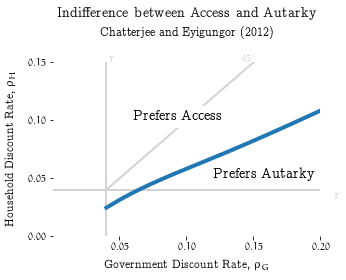

In [30]:
figs['CE12_indifference'] = plt.figure()


ax = plt.subplot(111)

ax.axhline(y=rCE12, color='lightgray', linewidth=2)
ax.axvline(x=rCE12, color='lightgray', linewidth=2)

(indifference_CE2012['rhoH']).plot(linewidth=4)
ax.plot([0.04, 0.2], [0.04, 0.2], linewidth=2, color='lightgray')

plt.box(False)

ax.set_xticks([0.05, 0.1, 0.15, 0.2])
ax.set_yticks([0.0, 0.05, 0.1, 0.15, 0.2])

ax.set_ylim([0, 0.15])

ax.set_xlabel(r'Government Discount Rate, $\rho_G$',
             fontsize=axis_labels_fs, labelpad=10)
ax.set_ylabel(r'Household Discount Rate, $\rho_H$',
             fontsize=axis_labels_fs, labelpad=10)

ax.text(0.12, 0.05, 'Prefers Autarky', 
       fontsize=15)
ax.text(0.14, 0.15, '$45^{\circ}$', color='lightgray')
ax.text(0.06, 0.10, 'Prefers Access', 
       fontsize=15, bbox=dict(color='white'))
ax.text(0.21, r - 0.008, '$r$', fontsize=text_fs, color='lightgray')
ax.text(r + 0.002, 0.15, '$r$', fontsize=text_fs, color='lightgray')

ax.text(0.10, 0.189, 'Indifference between Access and Autarky', 
       fontsize=title_fs, horizontalalignment='center')
ax.text(0.10, 0.173, 'Chatterjee and Eyigungor (2012)', 
        fontsize=subtitle_fs, horizontalalignment='center');

ax.set_xlim([0, 0.20]);


## CE12 LambdaD decomposition

In [31]:
lambdaD =  pd.read_csv(CE2012_lambdaDDecomposition_file, header=None,
                             names=[
                                 "betaH", 
                                 "1+lambdaHD", 
                                 "1+lambdaHHatD", 
                                 "1+lambdaGD", 
                                 "ratioH_HHat",
                                 "ratioHHat_G"
                             ])

In [32]:
lambdaD['ratio'] = lambdaD['1+lambdaHD'] /lambdaD['1+lambdaGD']  
lambdaD['rhoH'] = -np.log(lambdaD['betaH'] ** 4)

Text(0.2, 1.006, 'Decomposing $\\lambda_D$')

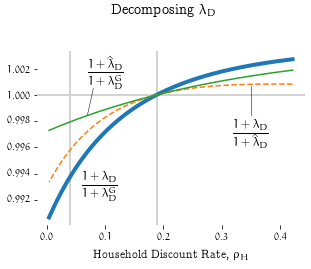

In [33]:
figs['CE12_lambdaD_decomposition'] = plt.figure()

ax = plt.subplot(111)

ax.axvline(x=rCE12, color='lightgray', linewidth=2)
ax.axvline(x=rhoCE12, color='lightgray', linewidth=2)
ax.axhline(y=1.0, color='lightgray', linewidth=2)


ax.plot(lambdaD['rhoH'], lambdaD['ratio'], "-", lw=4)
ax.plot(lambdaD['rhoH'], lambdaD['ratioH_HHat'], "--")
ax.plot(lambdaD['rhoH'], lambdaD['ratioHHat_G'], "-")

plt.box(False)

ax.text(0.06, 0.992, r'$ \displaystyle \frac{1+\lambda_D}{1+\lambda_D^G}$', fontsize=text_fs)
ax.text(0.07, 1.0005, r'$ \displaystyle \frac{1+\hat \lambda_D}{1+\lambda_D^G}$', fontsize=text_fs)
ax.text(0.32, 0.996, r'$ \displaystyle \frac{1+\lambda_D}{1+\hat \lambda_D}$', fontsize=text_fs)

ax.add_line(mlines.Line2D([0.07, 0.08], [0.9985, 1.0005], color="k", lw=0.5) )
ax.add_line(mlines.Line2D([0.35, 0.35], [0.9985, 1.0007], color="k", lw=0.5) );

ax.set_xlabel(r'Household Discount Rate, $\rho_H$',
             fontsize=axis_labels_fs, labelpad=10)

ax.text(0.20, 1.006, 'Decomposing $\lambda_D$', 
       fontsize=title_fs, horizontalalignment='center')


## Saving the plots

In [34]:
for name in figs:
    print(name)
    figs[name].savefig('fig_' + name + '.pdf', bbox_inches = "tight")

indifference
indifference_slides
welfare_theory
welfare_theory_slides
AG06
AG06_decomposition
AG06_decomposition_slides_0
AG06_decomposition_slides_1
AG06_decomposition_slides_2
Ar08
Ar08_decomposition
Ar08_decomposition_slides_0
Ar08_decomposition_slides_1
Ar08_decomposition_slides_2
Ar08_decomposition_slides_3
Ar08_decomposition_slides_4
CE12
CE12_decomposition
CE12_decomposition_slides_0
CE12_decomposition_slides_1
CE12_decomposition_slides_2
CE12_decomposition_slides_3
CE12_decomposition_slides_4
CE12_vs_Are2008
CE12_indifference
CE12_lambdaD_decomposition
